In [1]:
%matplotlib inline
import numpy as np
import pandas as pd
import matplotlib
import matplotlib.pyplot as plt
import math
from statsmodels.stats.outliers_influence import variance_inflation_factor
import seaborn as sns
from numpy import inf

In [2]:
matplotlib.rcParams['figure.figsize'] = (10.0, 8.0)

In [3]:
df=pd.read_excel('Training_data_1.xlsx')
df2=df
data = df2.replace(np.nan, 0.0)
df2=data.replace({-0.01: 0.0})

In [4]:
df2

,metamorphic_facies,composition,author,journal,region,sample name,host-rock_type/metamorphic_facies,lithology/protolith,P(kbar),T(°C),SiO2,TiO2,Al2O3,Cr2O3,FeOtotal,MnO,MgO,CaO
0,GR,M,[25727] ZOU LEI (2022),Contributions to Mineralogy and Petrology volu...,Mafic granulites from the North China Craton,samp. 17MD01,GRANULITE,mafic,11.0,850.0,38.35,0.04,20.54,0.01,0.00,6.54,5.13,0.78
1,GR,M,[25727] ZOU LEI (2022),Contributions to Mineralogy and Petrology volu...,Mafic granulites from the North China Craton,samp. 17MD01,GRANULITE,mafic,11.0,850.0,38.14,0.01,20.4,0.03,0.00,6.61,5.35,0.74
2,GR,M,[25727] ZOU LEI (2022),Contributions to Mineralogy and Petrology volu...,Mafic granulites from the North China Craton,samp. 17MD01,GRANULITE,mafic,11.0,850.0,37.77,0.02,20.37,0.01,0.00,6.81,5.05,0.76
3,GR,M,[25727] ZOU LEI (2022),Contributions to Mineralogy and Petrology volu...,Mafic granulites from the North China Craton,samp. 17MD01,GRANULITE,mafic,11.0,850.0,38.25,0.02,20.22,0.04,0.00,6.87,5,0.79
4,GR,M,[25727] ZOU LEI (2022),Contributions to Mineralogy and Petrology volu...,Mafic granulites from the North China Craton,samp. 17MD01,GRANULITE,mafic,11.0,850.0,38.02,0,20.34,0.05,0.00,7,4.88,0.8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14378,MS,CS,Zhai et al. (2014),"Lithos 190–191, 279–291","Xieertala Deposit, China",XL-49,metasomatic,Fe-Zn-skarn,0.0,0.0,37.68,0.15,8.24,<0.03,19.76,1.43,0.07,32.26
14379,MS,CS,Zhai et al. (2014),"Lithos 190–191, 279–291","Xieertala Deposit, China",XL-49,metasomatic,Fe-Zn-skarn,0.0,0.0,37.74,0.06,7.12,0.31,20.67,1.44,0.18,31.98
14380,MS,CS,Zhai et al. (2014),"Lithos 190–191, 279–291","Xieertala Deposit, China",XL-49,metasomatic,Fe-Zn-skarn,0.0,0.0,36.72,0.14,2.41,<0.03,27.07,1.32,0.13,31.22
14381,MS,CS,Zhai et al. (2014),"Lithos 190–191, 279–291","Xieertala Deposit, China",XL-49,metasomatic,Fe-Zn-skarn,0.0,0.0,38.18,<0.03,8.04,<0.03,19.68,1.51,0.07,32.55


In [5]:
data= df2.drop(columns=['author','journal','region','sample name','host-rock_type/metamorphic_facies','lithology/protolith','P(kbar)','T(°C)',])


In [6]:
def to_log (data=pd.DataFrame):
    df_log = data.applymap(lambda x: math.log10(x) if((x != 1.0) & (x!=0)) else 0)
    return df_log

In [7]:

data= data.replace('<0.03', 0)
data_rev= data.replace(np.nan, 0)


In [8]:
data_rev

,metamorphic_facies,composition,SiO2,TiO2,Al2O3,Cr2O3,FeOtotal,MnO,MgO,CaO
0,GR,M,38.35,0.04,20.54,0.01,0.00,6.54,5.13,0.78
1,GR,M,38.14,0.01,20.40,0.03,0.00,6.61,5.35,0.74
2,GR,M,37.77,0.02,20.37,0.01,0.00,6.81,5.05,0.76
3,GR,M,38.25,0.02,20.22,0.04,0.00,6.87,5.00,0.79
4,GR,M,38.02,0.00,20.34,0.05,0.00,7.00,4.88,0.80
...,...,...,...,...,...,...,...,...,...,...
14378,MS,CS,37.68,0.15,8.24,0.00,19.76,1.43,0.07,32.26
14379,MS,CS,37.74,0.06,7.12,0.31,20.67,1.44,0.18,31.98
14380,MS,CS,36.72,0.14,2.41,0.00,27.07,1.32,0.13,31.22
14381,MS,CS,38.18,0.00,8.04,0.00,19.68,1.51,0.07,32.55


In [9]:
# extractiong Sio2
df_Prob = data_rev[["metamorphic_facies","composition"]]
df_Prob

,metamorphic_facies,composition
0,GR,M
1,GR,M
2,GR,M
3,GR,M
4,GR,M
...,...,...
14378,MS,CS
14379,MS,CS
14380,MS,CS
14381,MS,CS


In [10]:
data_rev.drop(df.columns[[0,1]], axis=1, inplace=True)
data_rev

,SiO2,TiO2,Al2O3,Cr2O3,FeOtotal,MnO,MgO,CaO
0,38.35,0.04,20.54,0.01,0.00,6.54,5.13,0.78
1,38.14,0.01,20.40,0.03,0.00,6.61,5.35,0.74
2,37.77,0.02,20.37,0.01,0.00,6.81,5.05,0.76
3,38.25,0.02,20.22,0.04,0.00,6.87,5.00,0.79
4,38.02,0.00,20.34,0.05,0.00,7.00,4.88,0.80
...,...,...,...,...,...,...,...,...
14378,37.68,0.15,8.24,0.00,19.76,1.43,0.07,32.26
14379,37.74,0.06,7.12,0.31,20.67,1.44,0.18,31.98
14380,36.72,0.14,2.41,0.00,27.07,1.32,0.13,31.22
14381,38.18,0.00,8.04,0.00,19.68,1.51,0.07,32.55


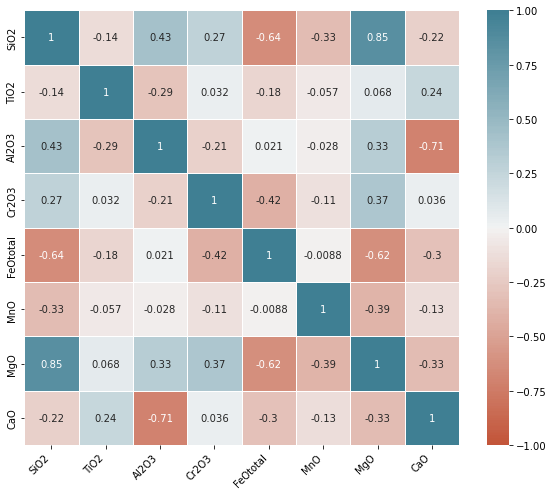

In [11]:

# imp variables

corr = data_rev.corr()


ax = sns.heatmap(
    corr, vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True, 
    linewidths=.5)
ax.set_xticklabels(ax.get_xticklabels(),
                   rotation=45,
                   horizontalalignment='right'
                   );



In [12]:
vif_data = pd.DataFrame()
vif_data["feature"] = data_rev.columns
    
    # calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data_rev.values, i)
                   for i in range(len(data_rev.columns))]
print(vif_data)


    feature         VIF
0      SiO2  871.424738
1      TiO2    1.266579
2     Al2O3  180.892973
3     Cr2O3    1.868025
4  FeOtotal   80.875328
5       MnO    6.146724
6       MgO   44.240558
7       CaO   34.428528


In [13]:
data_rev

,SiO2,TiO2,Al2O3,Cr2O3,FeOtotal,MnO,MgO,CaO
0,38.35,0.04,20.54,0.01,0.00,6.54,5.13,0.78
1,38.14,0.01,20.40,0.03,0.00,6.61,5.35,0.74
2,37.77,0.02,20.37,0.01,0.00,6.81,5.05,0.76
3,38.25,0.02,20.22,0.04,0.00,6.87,5.00,0.79
4,38.02,0.00,20.34,0.05,0.00,7.00,4.88,0.80
...,...,...,...,...,...,...,...,...
14378,37.68,0.15,8.24,0.00,19.76,1.43,0.07,32.26
14379,37.74,0.06,7.12,0.31,20.67,1.44,0.18,31.98
14380,36.72,0.14,2.41,0.00,27.07,1.32,0.13,31.22
14381,38.18,0.00,8.04,0.00,19.68,1.51,0.07,32.55


In [ ]:
#SiO conversion
df_SiO =data_rev.copy()
#taking out  df/SiOO2)
df_SiO=df_SiO.div(df_SiO['SiO2'], axis=0)
# rename columns
df_SiO.columns = '('+ df_SiO.columns +'/'+ 'SiO2)'

df_SiO=df_SiO.round(6)
df_SiO.drop(columns=['(SiO2/SiO2)'], axis=1, inplace=True)

df_SiO = df_SiO.applymap(lambda x: math.log10(x) if((x != 1.0) & (x!=0)) else 0)


#CaO converSiOon
df_CaO=data_rev.copy()
#taking out  df/CaO)
df_CaO=df_CaO.div(df_CaO['CaO'], axis=0)
# rename columns
df_CaO.columns = '('+ df_CaO.columns +'/'+ 'CaO)'

df_CaO=df_CaO.round(6)
df_CaO.drop(columns=['(CaO/CaO)'], axis=1, inplace=True)

df_CaO = df_CaO.applymap(lambda x: math.log10(x) if((x != 1.0) & (x!=0)) else 0)
df_CaO= df_CaO.replace(inf, 0)
df_CaO= df_CaO.replace(np.nan, 0)

#MgO conversion
df_MgO=data_rev.copy()
#taking out  df/MgO)
df_MgO=df_MgO.div(df_MgO['MgO'], axis=0)
# rename columns
df_MgO.columns = '('+ df_MgO.columns +'/'+ 'MgO)'

df_MgO=df_MgO.round(6)
df_MgO.drop(columns=['(MgO/MgO)'], axis=1, inplace=True)

df_MgO = df_MgO.applymap(lambda x: math.log10(x) if((x != 1.0) & (x!=0)) else 0)
df_MgO= df_MgO.replace(inf, 0)
df_MgO= df_MgO.replace(np.nan, 0)

#MnO conversion
df_MnO=data_rev.copy()
#taking out  df/MnO)
df_MnO=df_MnO.div(df_MnO['MnO'], axis=0)
# rename columns
df_MnO.columns = '('+ df_MnO.columns +'/'+ 'MnO)'

df_MnO=df_MnO.round(6)
df_MnO.drop(columns=['(MnO/MnO)'], axis=1, inplace=True)

df_MnO = df_MnO.applymap(lambda x: math.log10(x) if((x != 1.0) & (x!=0)) else 0)
df_MnO= df_MnO.replace(inf, 0)
df_MnO= df_MnO.replace(np.nan, 0)

#Al2O3 conversion
df_Al2O3=data_rev.copy()
#taking out  df/Al2O3)
df_Al2O3=df_Al2O3.div(df_Al2O3['Al2O3'], axis=0)
# rename columns
df_Al2O3.columns = '('+ df_Al2O3.columns +'/'+ 'Al2O3)'

df_Al2O3=df_Al2O3.round(6)
df_Al2O3.drop(columns=['(Al2O3/Al2O3)'], axis=1, inplace=True)

df_Al2O3 = df_Al2O3.applymap(lambda x: math.log10(x) if((x != 1.0) & (x!=0)) else 0)
df_Al2O3= df_Al2O3.replace(inf, 0)
df_Al2O3= df_Al2O3.replace(np.nan, 0)


#Cr2O3 conversion
df_Cr2O3=data_rev.copy()
#taking out  df/Cr2O3)
df_Cr2O3=df_Cr2O3.div(df_Cr2O3['Cr2O3'], axis=0)
# rename columns
df_Cr2O3.columns = '('+ df_Cr2O3.columns +'/'+ 'Cr2O3)'

df_Cr2O3=df_Cr2O3.round(6)
df_Cr2O3.drop(columns=['(Cr2O3/Cr2O3)'], axis=1, inplace=True)

df_Cr2O3 = df_Cr2O3.applymap(lambda x: math.log10(x) if((x != 1.0) & (x!=0)) else 0)
df_Cr2O3= df_Cr2O3.replace(inf, 0)
df_Cr2O3= df_Cr2O3.replace(np.nan, 0)

#FeO conversion
df_FeO=data_rev.copy()
#taking out  df/FeOtotal)
df_FeO=df_FeO.div(df_FeO['FeOtotal'], axis=0)
# rename columns
df_FeO.columns = '('+ df_FeO.columns +'/'+ 'FeO)'

df_FeO=df_FeO.round(6)
df_FeO.drop(columns=['(FeOtotal/FeO)'], axis=1, inplace=True)

df_Fe = df_FeO.applymap(lambda x: math.log10(x) if((x != 1.0) & (x!=0)) else 0)
df_FeO= df_FeO.replace(inf, 0)
df_FeO= df_FeO.replace(np.nan, 0)

data_ox= pd.concat([df_SiO,df_CaO,df_MgO,df_MnO,df_Al2O3,df_Cr2O3,df_FeO],axis=1)


In [18]:
data_o= pd.concat([df_Prob,data_rev,df_SiO,df_CaO,df_MgO,df_MnO,df_Al2O3,df_Cr2O3,df_FeO],axis=1)

In [19]:
data_o

,metamorphic_facies,composition,SiO2,TiO2,Al2O3,Cr2O3,FeOtotal,MnO,MgO,CaO,...,(MnO/Cr2O3),(MgO/Cr2O3),(CaO/Cr2O3),(SiO2/FeO),(TiO2/FeO),(Al2O3/FeO),(Cr2O3/FeO),(MnO/FeO),(MgO/FeO),(CaO/FeO)
0,GR,M,38.35,0.04,20.54,0.01,0.00,6.54,5.13,0.78,...,2.815578,2.710117,1.892095,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
1,GR,M,38.14,0.01,20.40,0.03,0.00,6.61,5.35,0.74,...,2.343080,2.251233,1.392110,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
2,GR,M,37.77,0.02,20.37,0.01,0.00,6.81,5.05,0.76,...,2.833147,2.703291,1.880814,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
3,GR,M,38.25,0.02,20.22,0.04,0.00,6.87,5.00,0.79,...,2.234897,2.096910,1.295567,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
4,GR,M,38.02,0.00,20.34,0.05,0.00,7.00,4.88,0.80,...,2.146128,1.989450,1.204120,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
14378,MS,CS,37.68,0.15,8.24,0.00,19.76,1.43,0.07,32.26,...,0.000000,0.000000,0.000000,1.906883,0.007591,0.417004,0.000000,0.072368,0.003543,1.632591
14379,MS,CS,37.74,0.06,7.12,0.31,20.67,1.44,0.18,31.98,...,0.667001,-0.236089,2.013517,1.825835,0.002903,0.344461,0.014998,0.069666,0.008708,1.547170
14380,MS,CS,36.72,0.14,2.41,0.00,27.07,1.32,0.13,31.22,...,0.000000,0.000000,0.000000,1.356483,0.005172,0.089028,0.000000,0.048762,0.004802,1.153306
14381,MS,CS,38.18,0.00,8.04,0.00,19.68,1.51,0.07,32.55,...,0.000000,0.000000,0.000000,1.940041,0.000000,0.408537,0.000000,0.076728,0.003557,1.653963


(-2.0, 20.0)

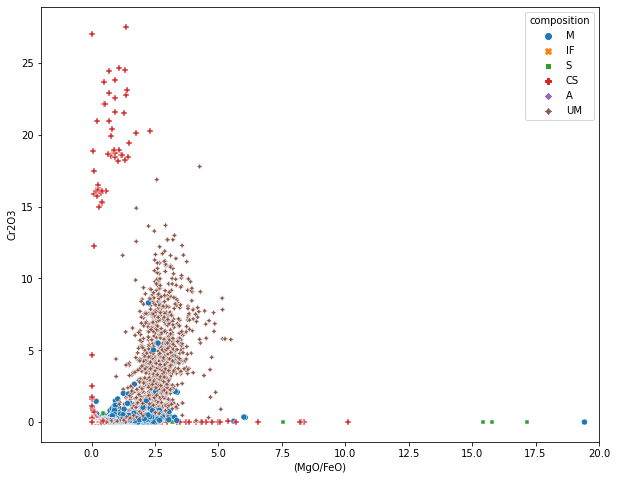

In [20]:
fig, ax = plt.subplots()
sns.scatterplot(data=data_o, x="(MgO/FeO)", y="Cr2O3",hue="composition", style="composition")
#plt.yscale("log")
#ax.set_ylim(-1,1)
ax.set_xlim(-2, 20)


In [21]:
#Si conversion
df_Si=data_rev.copy()
#taking out  df/SiO2)
df_Si=df_Si.div(df_Si['SiO2'], axis=0)
# rename columns
df_Si.columns = '('+ df_Si.columns +'/'+ 'SiO2)'

df_Si=df_Si.round(6)
df_Si.drop(columns=['(SiO2/SiO2)'], axis=1, inplace=True)
#taking out  df/Si
df_Si=df_Si.mul([0.752,1.179,0.791,0.847,0.836,1.491,1.071], axis='columns')
# rename columns
df_Si.rename(columns = {'(TiO2/SiO2)':'Ti/Si','(Al2O3/SiO2)':'Al/Si','(Cr2O3/SiO2)':'Cr/Si','(MnO/SiO2)':'Mn/Si','(FeOtotal/SiO2)':'Fe/Si','(MgO/SiO2)':'Mg/Si','(CaO/SiO2)':'Ca/Si'}, inplace = True)

df_Si = df_Si.applymap(lambda x: math.log10(x) if((x != 1.0) & (x!=0)) else 0)


#Ca conversion
df_Ca=data_rev.copy()
#taking out  df/CaO)
df_Ca=df_Ca.div(df_Ca['CaO'], axis=0)
# rename columns
df_Ca.columns = '('+ df_Ca.columns +'/'+ 'CaO)'

df_Ca=df_Ca.round(6)
df_Ca.drop(columns=['(CaO/CaO)'], axis=1, inplace=True)
#taking out  df/Ca
df_Ca=df_Ca.mul([0.933,0.702,0.550,0.369,0.781,0.791,1.391], axis='columns')
# rename columns
df_Ca.rename(columns = {'(TiO2/CaO)':'Ti/Ca','(Al2O3/CaO)':'Al/Ca','(Cr2O3/CaO)':'Cr/Ca','(MnO/CaO)':'Mn/Ca','(FeOtotal/CaO)':'Fe/Ca','(MgO/CaO)':'Mg/Ca','(SiO2/CaO)':'Si/Ca'}, inplace = True)

df_Ca = df_Ca.applymap(lambda x: math.log10(x) if((x != 1.0) & (x!=0)) else 0)
df_Ca= df_Ca.replace(inf, 0)
df_Ca= df_Ca.replace(np.nan, 0)

#Mg conversion
df_Mg=data_rev.copy()
#taking out  df/MgO)
df_Mg=df_Mg.div(df_Mg['MgO'], axis=0)
# rename columns
df_Mg.columns = '('+ df_Mg.columns +'/'+ 'MgO)'

df_Mg=df_Mg.round(6)
df_Mg.drop(columns=['(MgO/MgO)'], axis=1, inplace=True)
#taking out  df/Mg
df_Mg=df_Mg.mul([0.671,0.505,0.395,0.265,0.561,0.568,0.719], axis='columns')
# rename columns
df_Mg.rename(columns = {'(TiO2/MgO)':'Ti/Mg','(Al2O3/MgO)':'Al/Mg','(Cr2O3/MgO)':'Cr/Mg','(MnO/MgO)':'Mn/Mg','(FeOtotal/MgO)':'Fe/Mg','(SiO2/MgO)':'Si/Mg','(CaO/MgO)':'Ca/Mg'}, inplace = True)

df_Mg = df_Mg.applymap(lambda x: math.log10(x) if((x != 1.0) & (x!=0)) else 0)
df_Mg= df_Mg.replace(inf, 0)
df_Mg= df_Mg.replace(np.nan, 0)

#Mn conversion
df_Mn=data_rev.copy()
#taking out  df/MnO)
df_Mn=df_Mn.div(df_Mn['MnO'], axis=0)
# rename columns
df_Mn.columns = '('+ df_Mn.columns +'/'+ 'MnO)'

df_Mn=df_Mn.round(6)
df_Mn.drop(columns=['(MnO/MnO)'], axis=1, inplace=True)
#taking out  df/Mn
df_Mn=df_Mn.mul([1.181,0.888,0.696,0.467,0.987,1.760,1.265], axis='columns')
# rename columns
df_Mn.rename(columns = {'(TiO2/MnO)':'Ti/Mn','(Al2O3/MnO)':'Al/Mn','(Cr2O3/MnO)':'Cr/Mn','(MgO/MnO)':'Mg/Mn','(FeOtotal/MnO)':'Fe/Mn','(SiO2/MnO)':'Si/Mn','(CaO/MnO)':'Ca/Mn'}, inplace = True)

df_Mn = df_Mn.applymap(lambda x: math.log10(x) if((x != 1.0) & (x!=0)) else 0)
df_Mn= df_Mn.replace(inf, 0)
df_Mn= df_Mn.replace(np.nan, 0)

#Al conversion
df_Al=data_rev.copy()
#taking out  df/Al2O3)
df_Al=df_Al.div(df_Al['Al2O3'], axis=0)
# rename columns
df_Al.columns = '('+ df_Al.columns +'/'+ 'Al2O3)'

df_Al=df_Al.round(6)
df_Al.drop(columns=['(Al2O3/Al2O3)'], axis=1, inplace=True)
#taking out  df/Al
df_Al=df_Al.mul([1.181,0.888,0.696,0.467,0.987,1.760,1.265], axis='columns')
# rename columns
df_Al.rename(columns = {'(TiO2/Al2O3)':'Ti/Al','(MnO/Al2O3)':'Mn/Al','(Cr2O3/Al2O3)':'Cr/Al','(MgO/Al2O3)':'Mg/Al','(FeOtotal/Al2O3)':'Fe/Al','(SiO2/Al2O3)':'Si/Al','(CaO/Al2O3)':'Ca/Al'}, inplace = True)

df_Al = df_Al.applymap(lambda x: math.log10(x) if((x != 1.0) & (x!=0)) else 0)
df_Al= df_Al.replace(inf, 0)
df_Al= df_Al.replace(np.nan, 0)




#Cr conversion
df_Cr=data_rev.copy()
#taking out  df/Cr2O3)
df_Cr=df_Cr.div(df_Cr['Cr2O3'], axis=0)
# rename columns
df_Cr.columns = '('+ df_Cr.columns +'/'+ 'Cr2O3)'

df_Cr=df_Cr.round(6)
df_Cr.drop(columns=['(Cr2O3/Cr2O3)'], axis=1, inplace=True)
#taking out  df/Cr
df_Cr=df_Cr.mul([2.530,1.903,1.491,2.116,2.143,3.771,2.710], axis='columns')
# rename columns
df_Cr.rename(columns = {'(TiO2/Cr2O3)':'Ti/Cr','(MnO/Cr2O3)':'Mn/Cr','(Al2O3/Cr2O3)':'Al/Cr','(MgO/Cr2O3)':'Mg/Cr','(FeOtotal/Cr2O3)':'Fe/Cr','(SiO2/Cr2O3)':'Si/Cr','(CaO/Cr2O3)':'Ca/Cr'}, inplace = True)

df_Cr = df_Cr.applymap(lambda x: math.log10(x) if((x != 1.0) & (x!=0)) else 0)
df_Cr= df_Cr.replace(inf, 0)
df_Cr= df_Cr.replace(np.nan, 0)

#Fe conversion
df_Fe=data_rev.copy()
#taking out  df/FeOtotal)
df_Fe=df_Fe.div(df_Fe['FeOtotal'], axis=0)
# rename columns
df_Fe.columns = '('+ df_Fe.columns +'/'+ 'FeO)'

df_Fe=df_Fe.round(6)
df_Fe.drop(columns=['(FeOtotal/FeO)'], axis=1, inplace=True)
#taking out  df/Fe
df_Fe=df_Fe.mul([1.196,0.900,0.705,0.473,1.013,1.783,1.281], axis='columns')
# rename columns
df_Fe.rename(columns = {'(TiO2/FeO)':'Ti/Fe','(MnO/FeO)':'Mn/Fe','(Al2O3/FeO)':'Al/Fe','(MgO/FeO)':'Mg/Fe','(Cr2O3/FeO)':'Cr/Fe','(SiO2/FeO)':'Si/Fe','(CaO/FeO)':'Ca/Fe'}, inplace = True)

df_Fe = df_Fe.applymap(lambda x: math.log10(x) if((x != 1.0) & (x!=0)) else 0)
df_Fe= df_Fe.replace(inf, 0)
df_Fe= df_Fe.replace(np.nan, 0)

data_ct= pd.concat([df_Si,df_Ca,df_Mg,df_Mn,df_Al,df_Cr,df_Fe],axis=1)

In [25]:
#Fe/Mg/Ca/Mn no conversion
df_n=data_rev.copy()

df_n =df_n[['FeOtotal','MnO','MgO','CaO']]


df_n1 = df_n['FeOtotal'].div(71.8444)
df_n2 = df_n['MgO'].div(40.305)
df_n3 = df_n['CaO'].div(56.0774)


#df_n =(df_n['Mno']/54.9380)


df_n= pd.concat([df_n1,df_n2,df_n3],axis=1)



df_n['(Fe+Mg)']= df_n['MgO'] + df_n['FeOtotal']
df_n['(Ca+Mg)']=df_n['CaO'] + df_n['MgO'] 



df_n['Mg/(Fe+Mg)']=df_n['MgO'].div(df_n['(Fe+Mg)'], axis=0)
df_n['Ca/(Ca+Mg)']=df_n['CaO'].div(df_n['(Ca+Mg)'], axis=0)




In [27]:
data_no=pd.concat([df_n['Ca/(Ca+Mg)'],df_n['Mg/(Fe+Mg)']],axis=1)

In [28]:

# imp variables

vif_data = pd.DataFrame()
vif_data["feature"] = data_no.columns
    
    # calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(data_no.values, i)
                   for i in range(len(data_no.columns))]
print(vif_data)




      feature       VIF
0  Ca/(Ca+Mg)  1.214657
1  Mg/(Fe+Mg)  1.214657


In [ ]:
log_norm.drop(log_norm.columns[[0,1]], axis=1, inplace=True)

In [ ]:
log_norm

In [ ]:
vif_data = pd.DataFrame()
vif_data["feature"] = log_norm.columns
# calculating VIF for each feature
vif_data["VIF"] = [variance_inflation_factor(log_norm.values, i)
                   for i in range(len(log_norm.columns))]
print(vif_data)

In [ ]:
log_norm.describe()

In [ ]:
corr = log_norm.corr()
ax = sns.heatmap(
    corr, 
    vmin=-1, vmax=1, center=0,
    cmap=sns.diverging_palette(20, 220, n=200),
    square=True,
    annot=True, 
    linewidths=.5    
)
ax.set_xticklabels(
    ax.get_xticklabels(),
    rotation=45,
    horizontalalignment='right'
);

In [ ]:
dist_p = log_norm
g = sns.PairGrid(dist_p)
g.map_upper(sns.histplot)
g.map_lower(sns.kdeplot, fill=True)
g.map_diag(sns.histplot, kde=True)

In [ ]:
df_mg = df_o[["MgO"]]
df_mg

In [ ]:
df_fe =df_log[["FeO"]]
df_fe

In [ ]:
#taking out log Mg/Fe
log_mg_fe=df_mg.sub(df_fe['FeO'], axis=0)
log_mg_fe.rename(columns = {'MgO':'log(MgO/FeOtotal)'}, inplace = True)
log_mg_fe

In [ ]:
df_Ti_Si = log_norm.iloc[:, :1]
df_Ti_Si

In [ ]:
df_p = pd.concat([df_Ti_Si, log_mg_fe,df_Prob,], axis=1)

In [ ]:
df_p

In [ ]:
df_pl=df_p.head(-2)

In [ ]:
sns.scatterplot(data=df_pl, x="log(TiO2/SiO2)", y="log(MgO/FeOtotal)", hue="Group", style="Group")


In [ ]:
X = df_pl.iloc[:, :2].values
y = df_pl[["Probability"]].values
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [ ]:
X = sc.fit_transform(X)

In [ ]:
# Helper function to plot a decision boundary.
def plot_decision_boundary(pred_func):
    # Set min and max values and give it some padding
    x_min, x_max = X[:, 0].min() - .5, X[:, 0].max() + .5
    y_min, y_max = X[:, 1].min() - .5, X[:, 1].max() + .5
    h = 0.01
    # Generate a grid of points with distance h between them
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h), np.arange(y_min, y_max, h))
    # Predict the function value for the whole gid
    Z = pred_func(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    # Plot the contour and training examples
    plt.contourf(xx, yy, Z, cmap=plt.cm.Spectral)
    plt.scatter(X[:, 0], X[:, 1], c=y, cmap=plt.cm.Spectral)
    

In [ ]:
from sklearn.linear_model import LogisticRegression
# Train the logistic rgeression classifier
clf = skt.linear_model.LogisticRegressionCV()

In [ ]:
clf.fit(X,y)

In [ ]:
# Plot the decision boundary
plot_decision_boundary(lambda x: clf.predict(x))
plt.title("Logistic Regression")
plt.xlabel('log(TiO2/SiO2)')
plt.ylabel('log(MgO/FeOtotal)')
plt.grid(True)

In [ ]:
b = clf.intercept_[0]

In [ ]:
b

In [ ]:
w1, w2 = clf.coef_.T
# Calculate the intercept and gradient of the decision boundary.
c = -b/w2
m = -w1/w2

In [ ]:
c

In [ ]:
m